In [1]:
# encoding: utf-8

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
focos = gpd.read_file("/home/labgeo7/Denis/ser411/TMP/simple_geo.py/PYTHON_GILBERTO/Focos_2016/Focos.2016-01-01.2016-12-31.shp")

In [5]:
focos.head(2)

,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,geometry
0,2016/01/01 16:28:16,AQUA_M-T,Brasil,Piaui,Parnagua,Cerrado,0,6.5,1.0,-10.209,-44.694,,0.0,POINT (-44.694 -10.209)
1,2016/01/01 16:28:16,AQUA_M-T,Brasil,Minas Gerais,Nova Uniao,Cerrado,0,44.6,0.3,-19.576,-43.593,,0.0,POINT (-43.593 -19.576)


In [6]:
focos["timestamp"] = pd.to_datetime(focos["DataHora"])

In [9]:
focos_to = focos[focos.Estado=="Tocantins"]

In [10]:
focos_to_9 = focos_to[focos_to.timestamp.dt.month==9]

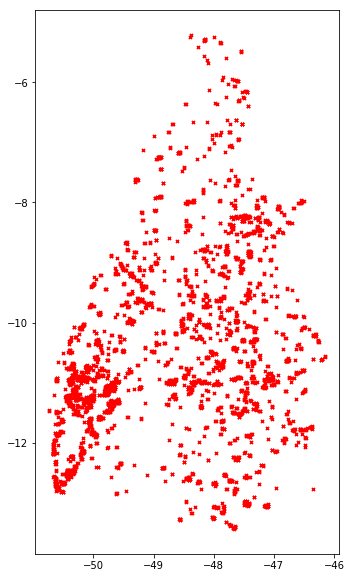

In [11]:
focos_to_9.plot(marker='x', color='red', markersize=10, figsize=(20, 10));

In [12]:
municipios = gpd.read_file("/home/labgeo7/Denis/ser411/TMP/simple_geo.py/PYTHON_GILBERTO/Municipios_BR/BRMUE250GC_SIR.shp")

municipios.head(2)

,NM_MUNICIP,CD_GEOCMU,geometry
0,ALTA FLORESTA D'OESTE,1100015,POLYGON ((-62.19464667599993 -11.8274570359999...
1,ARIQUEMES,1100023,POLYGON ((-62.53647840499997 -9.73221504899993...


In [13]:
munic_to = municipios[municipios["CD_GEOCMU"].str[0:2] == "17"]

munic_to.head(2)

,NM_MUNICIP,CD_GEOCMU,geometry
311,ABREULÂNDIA,1700251,POLYGON ((-49.39149645199996 -9.17452846299994...
312,AGUIARNÓPOLIS,1700301,POLYGON ((-47.57648308799997 -6.41472972499997...


In [22]:
focos_to_9.crs = {'init': 'espg:4674'}
munic_to.crs = {'init': 'espg:4674'}

munic_to.head(2)

,NM_MUNICIP,CD_GEOCMU,geometry
index_right,,,
311,ABREULÂNDIA,1700251,POLYGON ((-49.39149645199996 -9.17452846299994...
312,AGUIARNÓPOLIS,1700301,POLYGON ((-47.57648308799997 -6.41472972499997...


In [30]:
munic_to_index = munic_to.set_index('NM_MUNICIP')

munic_to_index.head(2)

,CD_GEOCMU,geometry
NM_MUNICIP,,
ABREULÂNDIA,1700251,POLYGON ((-49.39149645199996 -9.17452846299994...
AGUIARNÓPOLIS,1700301,POLYGON ((-47.57648308799997 -6.41472972499997...


In [24]:
join_municipio_foco_9 = gpd.sjoin(focos_to_9, munic_to, op='intersects', how="right")

In [25]:
join_municipio_foco_9.head(2)

,index_left,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,timestamp,NM_MUNICIP,CD_GEOCMU,geometry
index_right,,,,,,,,,,,,,,,,,,
366,84977.0,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40.0,0.3,1.0,-8.048,-47.666,,0.0,2016-09-01 16:04:38,GOIATINS,1709005,POLYGON ((-47.43492963199998 -7.55911717699996...
366,84996.0,2016/09/01 16:04:38,AQUA_M-T,Brasil,Tocantins,Goiatins,Cerrado,40.0,0.3,1.0,-8.047,-47.670,,0.0,2016-09-01 16:04:38,GOIATINS,1709005,POLYGON ((-47.43492963199998 -7.55911717699996...


In [26]:
foco_join_again = join_municipio_foco_9.groupby('NM_MUNICIP').Municipi.count()

In [27]:
foco_join_again.name = 'Focos de Queimada em Set/16'

In [28]:
focos_municipio_to = pd.concat([munic_to_index, foco_join_again], axis=1)
focos_municipio_to.head()

,CD_GEOCMU,geometry,Focos de Queimada em Set/16
ABREULÂNDIA,1700251,POLYGON ((-49.39149645199996 -9.17452846299994...,50
AGUIARNÓPOLIS,1700301,POLYGON ((-47.57648308799997 -6.41472972499997...,0
ALIANÇA DO TOCANTINS,1700350,POLYGON ((-48.71252417899996 -11.1699301449999...,19
ALMAS,1700400,POLYGON ((-47.26256828099997 -10.9813311369999...,42
ALVORADA,1700707,POLYGON ((-49.03874863299995 -12.2244394629999...,1


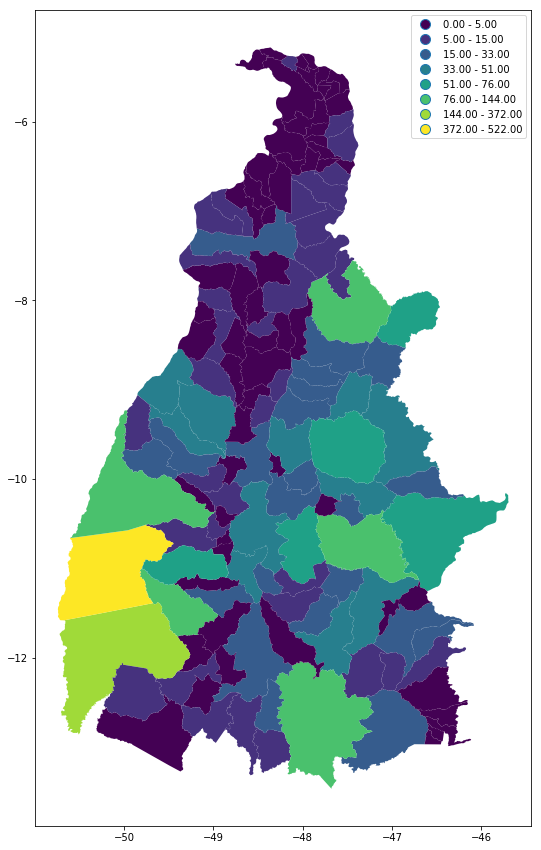

In [29]:
mapa = focos_municipio_to.plot(column='Focos de Queimada em Set/16', figsize = (10, 15), k=8, legend = True, scheme = 'Fisher_jenks')
mapa.plot();